# Requirements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from tensorflow.keras.models import load_model
from Cavity_detection.src.utils import *

2023-04-12 15:22:34.878407: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 15:22:35.032581: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-12 15:22:35.032625: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-12 15:22:36.005504: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

# Load model

In [2]:
model = 'CNN'

In [3]:
# Create a DataFrame from the history dictionary
history_df = pd.read_csv(f'Cavity_detection/models/{model}/training_history.csv')

In [4]:
# Create a DataFrame that calculates the mean of each column grouping by epoch
mean_history_df = history_df.groupby('epoch').mean().reset_index()

# Evaluation

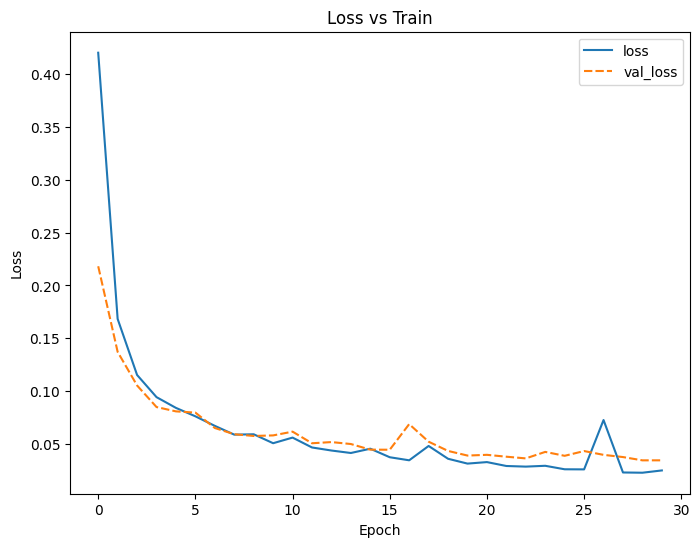

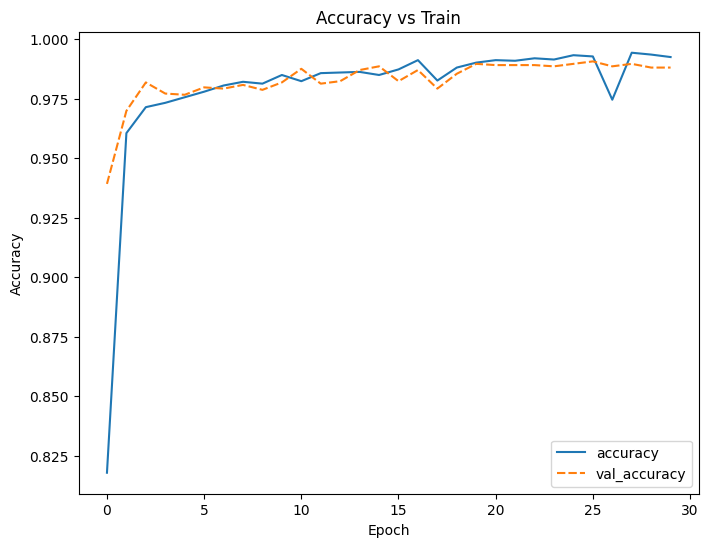

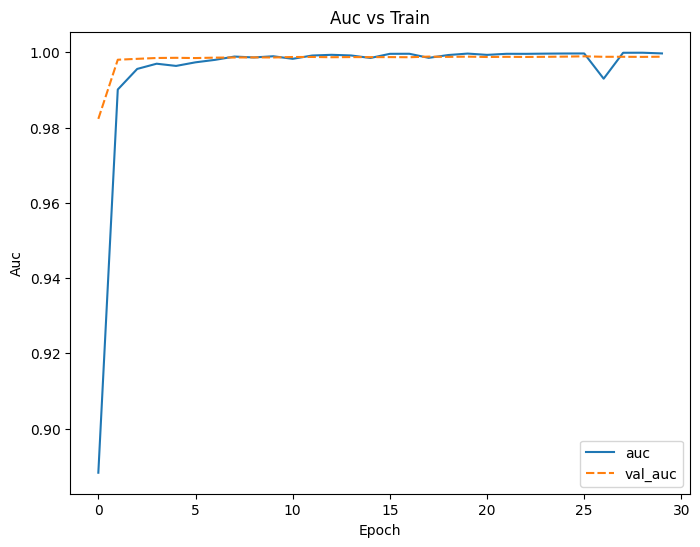

In [5]:
# Define the metrics to plot
metrics = ['loss', 'accuracy', 'auc']

# Loop over the metrics
for metric in metrics:
    # Select the columns for the current metric
    metric_cols = [col for col in mean_history_df.columns if metric in col]
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=mean_history_df[metric_cols])
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} vs Train')
    plt.show()


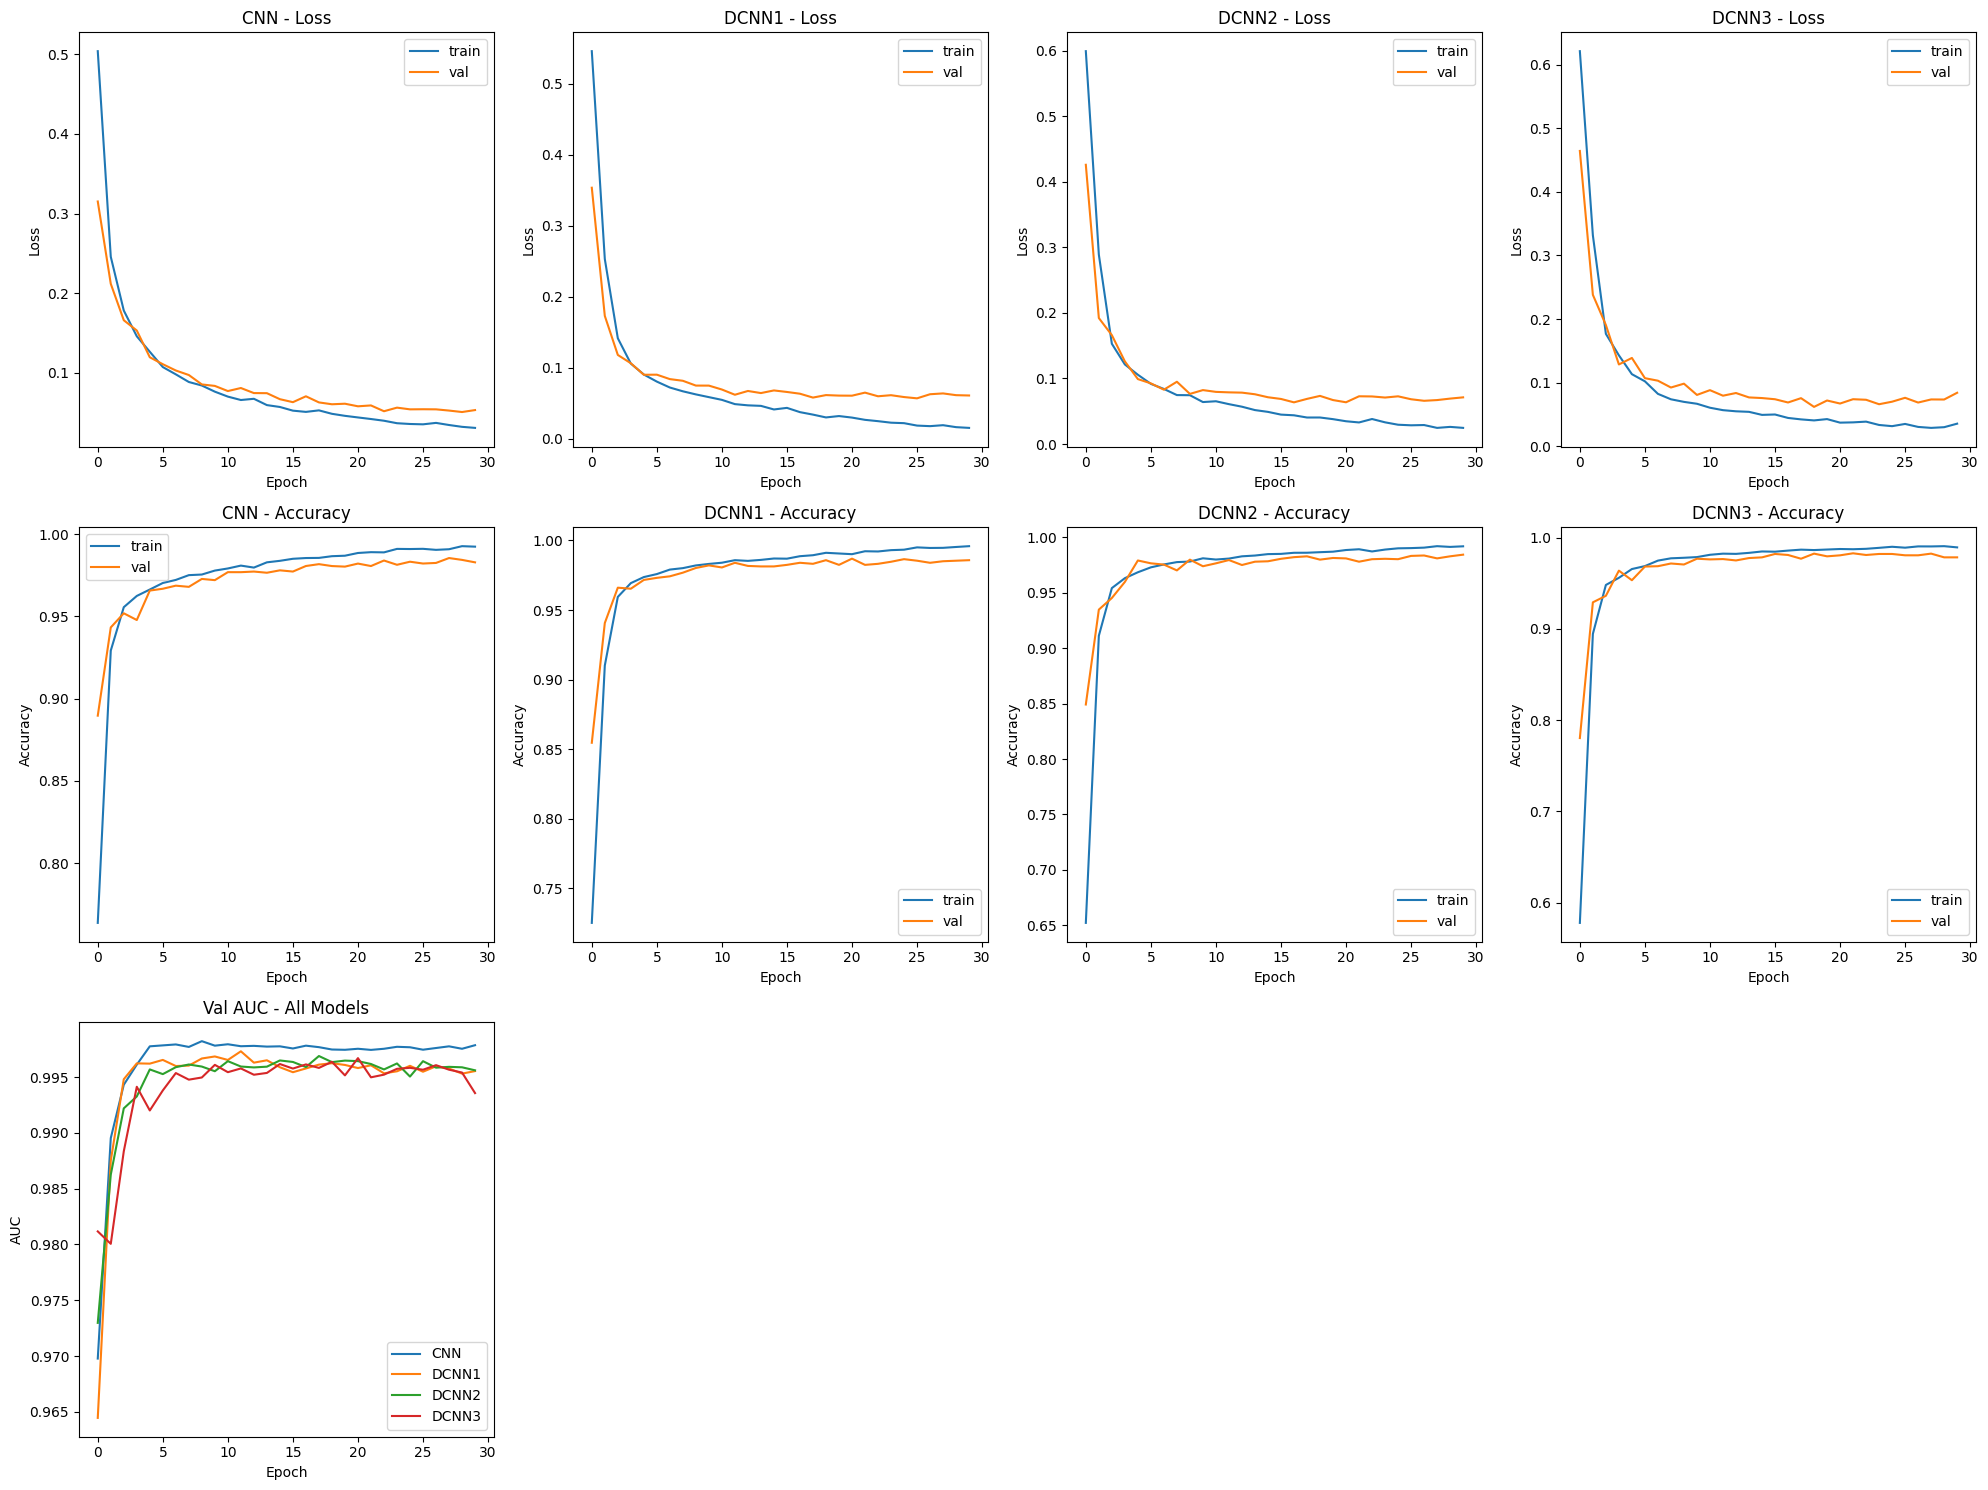

In [6]:
# Define the list of models
models = ['CNN', 'DCNN1', 'DCNN2', 'DCNN3']

# Define the figure and axes
fig, axs = plt.subplots(3, len(models), figsize=(5*len(models), 15))

# Loop over the models
for i, model in enumerate(models):
    # Load the training history
    history_df = pd.read_csv(f'Cavity_detection/models/{model}/training_history.csv')

    # Calculate the mean training history
    mean_history_df = history_df.groupby('epoch').mean().reset_index()
    # Plot val_loss vs train
    axs[0, i].plot(mean_history_df['epoch'], mean_history_df['loss'], label='train')
    axs[0, i].plot(mean_history_df['epoch'], mean_history_df['val_loss'], label='val')
    axs[0, i].set_xlabel('Epoch')
    axs[0, i].set_ylabel('Loss')
    axs[0, i].set_title(f'{model} - Loss')
    axs[0, i].legend()

    # Plot val_accuracy vs train
    axs[1, i].plot(mean_history_df['epoch'], mean_history_df['accuracy'], label='train')
    axs[1, i].plot(mean_history_df['epoch'], mean_history_df['val_accuracy'], label='val')
    axs[1, i].set_xlabel('Epoch')
    axs[1, i].set_ylabel('Accuracy')
    axs[1, i].set_title(f'{model} - Accuracy')
    axs[1, i].legend()

    # Only plot val_auc for the last row
    if i == 0:
        axs[2, i].set_xlabel('Epoch')
        axs[2, i].set_ylabel('AUC')
        axs[2, i].set_title(f'Val AUC - All Models')
        for j, model in enumerate(models):
            history_df = pd.read_csv(f'Cavity_detection/models/{model}/training_history.csv')
            mean_history_df = history_df.groupby('epoch').mean().reset_index()
            axs[2, i].plot(mean_history_df['epoch'], mean_history_df['val_auc'], label=model)
        axs[2, i].legend()
    else:
        axs[2, i].axis('off')

plt.tight_layout()
plt.show()


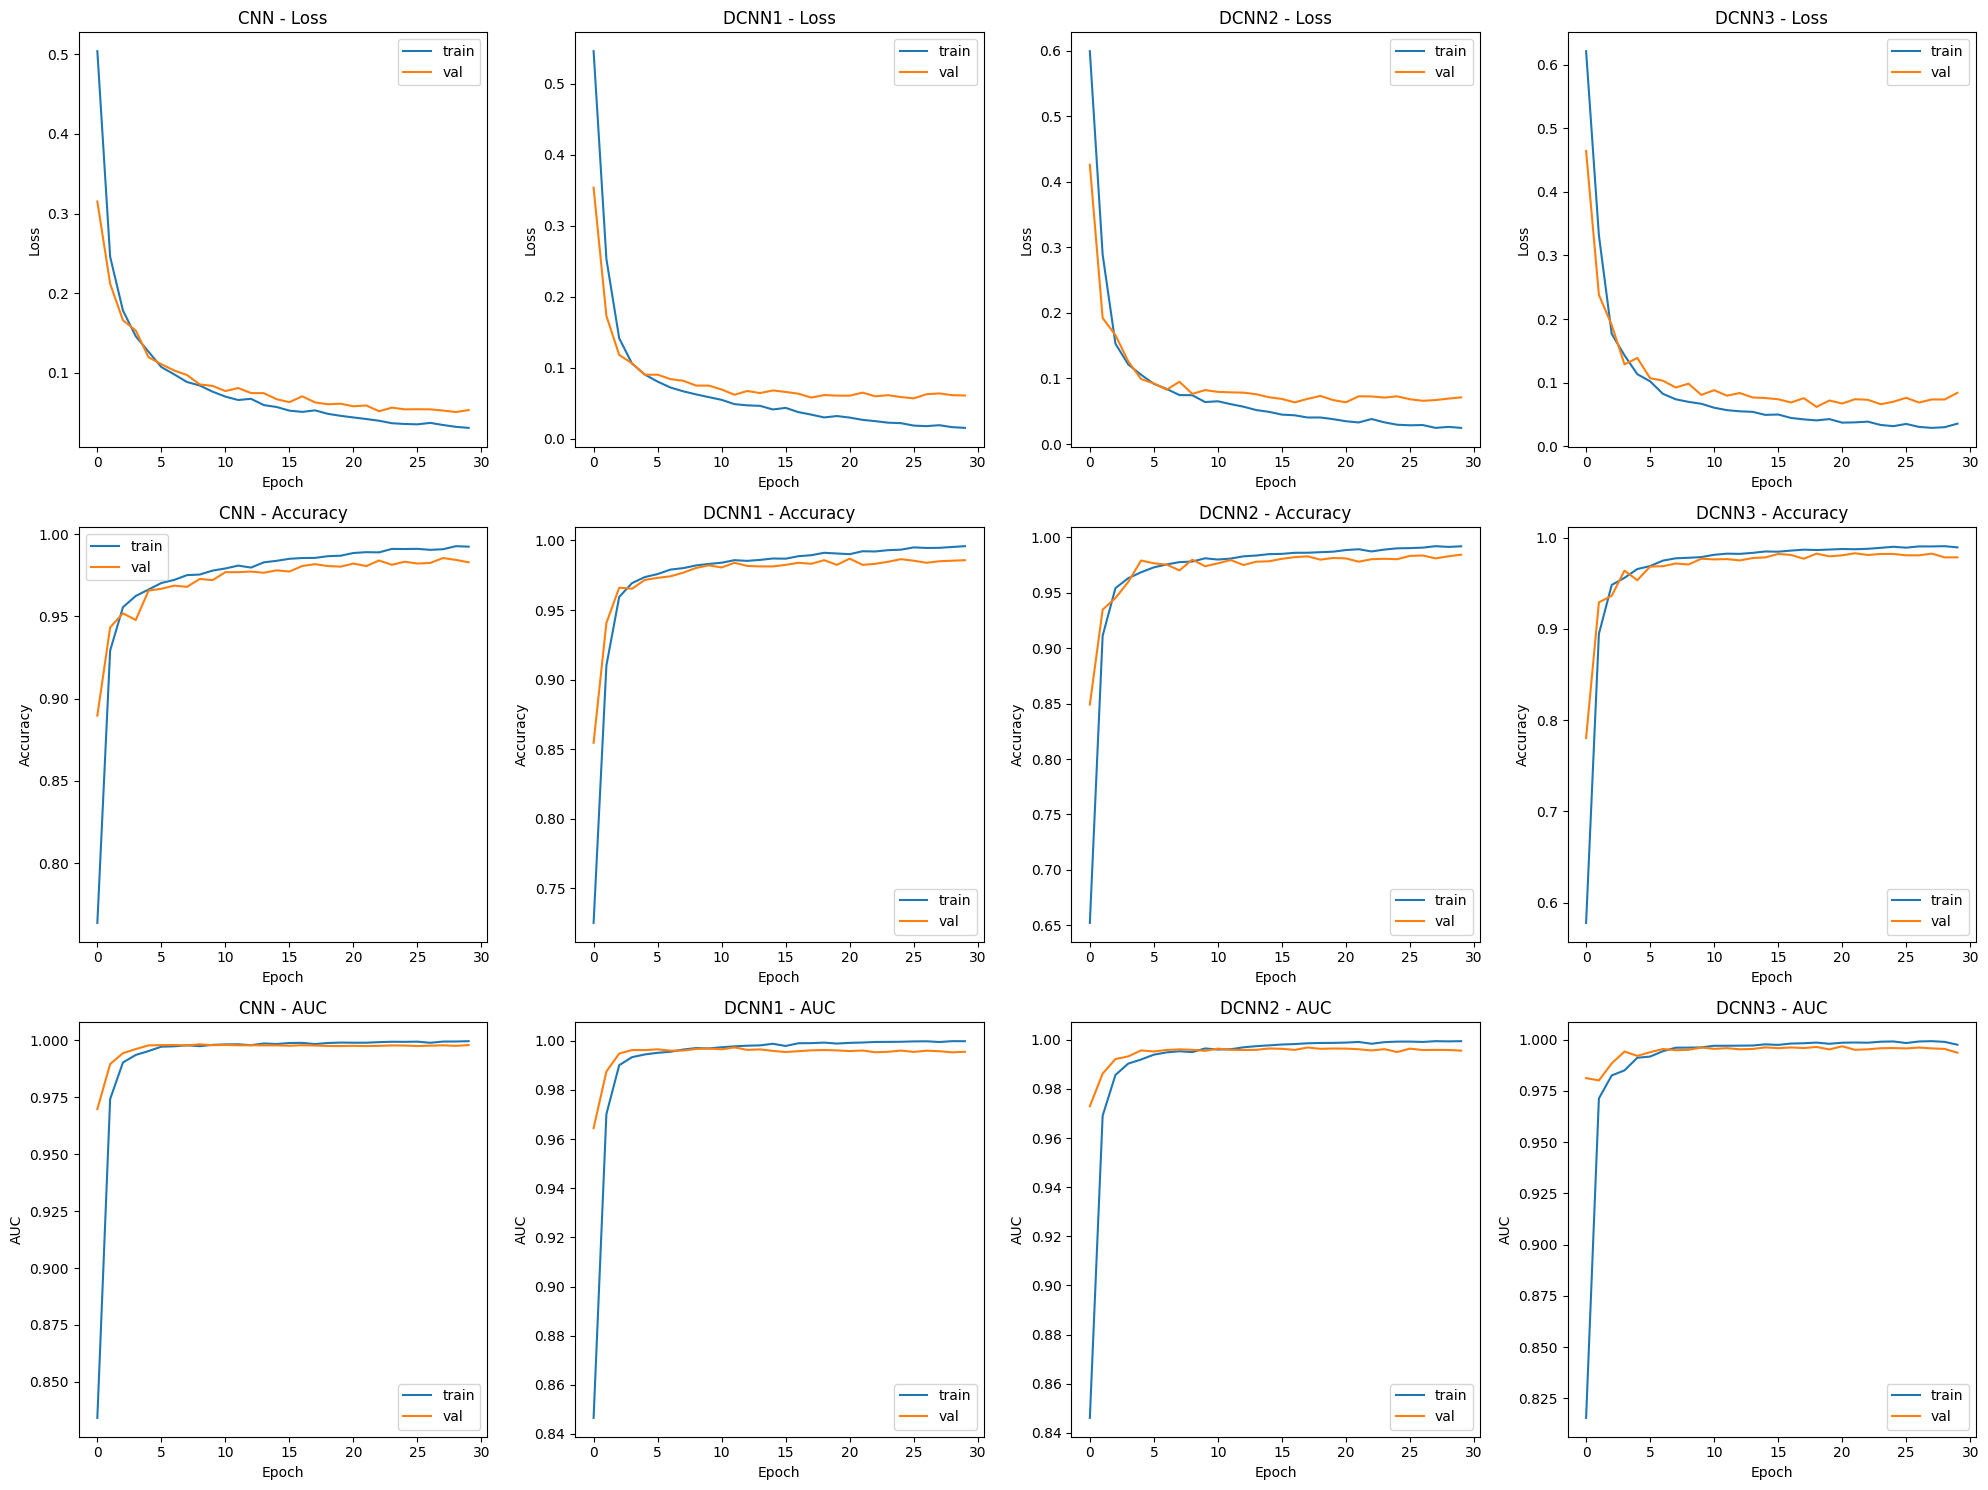

In [7]:
# Define the list of models
models = ['CNN', 'DCNN1', 'DCNN2', 'DCNN3']

# Define the figure and axes
fig, axs = plt.subplots(3, len(models), figsize=(5*len(models), 15))

# Loop over the models
for i, model in enumerate(models):
    # Load the training history
    history_df = pd.read_csv(f'Cavity_detection/models/{model}/training_history.csv')

    # Calculate the mean training history
    mean_history_df = history_df.groupby('epoch').mean().reset_index()
    # Plot val_loss vs train
    axs[0, i].plot(mean_history_df['epoch'], mean_history_df['loss'], label='train')
    axs[0, i].plot(mean_history_df['epoch'], mean_history_df['val_loss'], label='val')
    axs[0, i].set_xlabel('Epoch')
    axs[0, i].set_ylabel('Loss')
    axs[0, i].set_title(f'{model} - Loss')
    axs[0, i].legend()

    # Plot val_accuracy vs train
    axs[1, i].plot(mean_history_df['epoch'], mean_history_df['accuracy'], label='train')
    axs[1, i].plot(mean_history_df['epoch'], mean_history_df['val_accuracy'], label='val')
    axs[1, i].set_xlabel('Epoch')
    axs[1, i].set_ylabel('Accuracy')
    axs[1, i].set_title(f'{model} - Accuracy')
    axs[1, i].legend()

    # Plot val_auc vs train
    axs[2, i].plot(mean_history_df['epoch'], mean_history_df['auc'], label='train')
    axs[2, i].plot(mean_history_df['epoch'], mean_history_df['val_auc'], label='val')
    axs[2, i].set_xlabel('Epoch')
    axs[2, i].set_ylabel('AUC')
    axs[2, i].set_title(f'{model} - AUC')
    axs[2, i].legend()

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f63fdc3-7b28-4cc7-8735-09f23d070fd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>